In [1]:
!pip install roboflow
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.4/80.4 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 5.1 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 870.5/870.5 kB 133.4 kB/s eta 0:00:00


In [2]:
import torch
import warnings
import os
from IPython.display import display, Image
from roboflow import Roboflow
from google.colab import drive
from ultralytics import YOLO


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [3]:
drive.mount('/content/drive')
path_data = '/content/drive/My Drive/DREAMS/SKIN_CANCER'

Mounted at /content/drive


In [4]:
os.listdir(path_data)

['YoloV9.ipynb', 'SKIN_CANCER_RESULT.gsheet', 'YoloV11.ipynb']

In [5]:
rf = Roboflow(api_key="nWr9KTX5ZS7RpXl1PycI")
project = rf.workspace("comvis-kuueo").project("skin_lesion_detection-bvzqy")
version = project.version(2)
dataset = version.download("yolov11")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Skin_Lesion_Detection-2 in yolov11:: 100%|██████████| 7012/7012 [00:00<00:00, 10109.82it/s]


In [6]:
# Load a COCO-pretrained YOLO11n model
model = YOLO("yolo11m.pt")

# Train the model on the COCO8 example dataset for 100 epochs
results = model.train(data="/content/Skin_Lesion_Detection-2/data.yaml", epochs=100, imgsz=640)


Ultralytics 8.3.13 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolo11m.pt, data=/content/Skin_Lesion_Detection-2/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf

100%|██████████| 755k/755k [00:00<00:00, 112MB/s]


Overriding model.yaml nc=80 with nc=7

                   from  n    params  module                                       arguments                     
  0                  -1  1      1856  ultralytics.nn.modules.conv.Conv             [3, 64, 3, 2]                 
  1                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  2                  -1  1    111872  ultralytics.nn.modules.block.C3k2            [128, 256, 1, True, 0.25]     
  3                  -1  1    590336  ultralytics.nn.modules.conv.Conv             [256, 256, 3, 2]              
  4                  -1  1    444928  ultralytics.nn.modules.block.C3k2            [256, 512, 1, True, 0.25]     
  5                  -1  1   2360320  ultralytics.nn.modules.conv.Conv             [512, 512, 3, 2]              
  6                  -1  1   1380352  ultralytics.nn.modules.block.C3k2            [512, 512, 1, True]           
  7                  -1  1   2360320  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 349MB/s]


AMP: checks passed ✅


train: Scanning /content/Skin_Lesion_Detection-2/train/labels... 2800 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2800/2800 [00:01<00:00, 1514.60it/s]


train: New cache created: /content/Skin_Lesion_Detection-2/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


A new version of Albumentations is available: 1.4.18 (you have 1.4.15). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
val: Scanning /content/Skin_Lesion_Detection-2/valid/labels... 350 images, 1 backgrounds, 0 corrupt: 100%|██████████| 350/350 [00:00<00:00, 1350.58it/s]


val: New cache created: /content/Skin_Lesion_Detection-2/valid/labels.cache
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000909, momentum=0.9) with parameter groups 106 weight(decay=0.0), 113 weight(decay=0.0005), 112 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      8.79G      1.377      2.614      1.637         41        640: 100%|██████████| 175/175 [01:47<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:06<00:00,  1.65it/s]

                   all        350        355      0.518      0.323      0.335      0.181



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      8.74G       1.45      2.045      1.629         30        640: 100%|██████████| 175/175 [01:44<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:06<00:00,  1.78it/s]

                   all        350        355      0.271      0.453      0.305      0.178



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      8.74G      1.432       1.98      1.622         26        640: 100%|██████████| 175/175 [01:44<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.12it/s]

                   all        350        355      0.729      0.347      0.371      0.228



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      8.74G      1.407      1.896      1.583         37        640: 100%|██████████| 175/175 [01:42<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.08it/s]

                   all        350        355       0.39      0.455      0.365      0.203



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      8.69G       1.35      1.789      1.542         33        640: 100%|██████████| 175/175 [01:43<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.14it/s]

                   all        350        355      0.411      0.622      0.524      0.315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      8.72G      1.303      1.698       1.49         26        640: 100%|██████████| 175/175 [01:42<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.02it/s]

                   all        350        355      0.332      0.413      0.315      0.158



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      8.73G      1.288      1.662      1.477         34        640: 100%|██████████| 175/175 [01:43<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.94it/s]

                   all        350        355      0.511      0.627       0.55      0.337



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      8.73G       1.28       1.61      1.479         31        640: 100%|██████████| 175/175 [01:42<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:06<00:00,  1.81it/s]

                   all        350        355      0.451      0.624      0.507      0.298



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      8.69G      1.277      1.608      1.482         37        640: 100%|██████████| 175/175 [01:43<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.87it/s]

                   all        350        355      0.547      0.699      0.599      0.359



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      8.73G      1.227      1.515      1.448         28        640: 100%|██████████| 175/175 [01:42<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.08it/s]

                   all        350        355      0.451       0.66      0.548      0.354



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      8.73G      1.228      1.498      1.441         28        640: 100%|██████████| 175/175 [01:42<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.97it/s]

                   all        350        355      0.591      0.653      0.618      0.372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      8.73G       1.21       1.45      1.431         31        640: 100%|██████████| 175/175 [01:43<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.14it/s]

                   all        350        355      0.588      0.691      0.648      0.409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      8.69G      1.209       1.46      1.426         40        640: 100%|██████████| 175/175 [01:42<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.14it/s]

                   all        350        355      0.555      0.617      0.632      0.385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      8.73G      1.193       1.42      1.427         36        640: 100%|██████████| 175/175 [01:43<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.15it/s]

                   all        350        355      0.409      0.582      0.525       0.32



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      8.73G      1.172      1.398      1.415         32        640: 100%|██████████| 175/175 [01:42<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.10it/s]

                   all        350        355      0.553      0.731      0.613      0.376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      8.73G      1.188      1.433      1.419         29        640: 100%|██████████| 175/175 [01:43<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.90it/s]

                   all        350        355      0.538      0.771      0.692      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      8.69G      1.154      1.377      1.397         27        640: 100%|██████████| 175/175 [01:41<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.92it/s]

                   all        350        355      0.489      0.683      0.647      0.417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      8.73G      1.161      1.381      1.393         33        640: 100%|██████████| 175/175 [01:43<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.03it/s]

                   all        350        355      0.478      0.731      0.649      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      8.73G      1.139      1.326      1.376         27        640: 100%|██████████| 175/175 [01:41<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.08it/s]

                   all        350        355      0.515      0.596      0.514      0.332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      8.73G       1.14      1.348      1.395         24        640: 100%|██████████| 175/175 [01:43<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.09it/s]

                   all        350        355      0.482      0.592      0.544      0.336



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      8.69G      1.116      1.283      1.365         30        640: 100%|██████████| 175/175 [01:42<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.15it/s]

                   all        350        355       0.59      0.699      0.655      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      8.73G      1.142      1.301      1.391         29        640: 100%|██████████| 175/175 [01:43<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.14it/s]

                   all        350        355      0.541      0.674      0.648      0.414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      8.73G        1.1      1.276      1.354         35        640: 100%|██████████| 175/175 [01:42<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.15it/s]

                   all        350        355      0.685      0.738      0.751      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      8.73G      1.111      1.269      1.363         31        640: 100%|██████████| 175/175 [01:44<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.14it/s]

                   all        350        355      0.574      0.722      0.675       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      8.69G      1.085      1.235      1.345         36        640: 100%|██████████| 175/175 [01:42<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.13it/s]

                   all        350        355       0.69      0.755       0.76      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      8.73G      1.107       1.26      1.355         27        640: 100%|██████████| 175/175 [01:43<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:06<00:00,  1.73it/s]

                   all        350        355      0.639      0.722      0.717       0.46



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      8.73G      1.081      1.238      1.349         38        640: 100%|██████████| 175/175 [01:42<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.97it/s]

                   all        350        355      0.586      0.685      0.682      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      8.73G      1.103      1.234       1.37         41        640: 100%|██████████| 175/175 [01:41<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.84it/s]

                   all        350        355      0.603      0.615       0.64      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      8.69G      1.083      1.192      1.346         31        640: 100%|██████████| 175/175 [01:42<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.87it/s]

                   all        350        355      0.606      0.712      0.675      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      8.73G      1.076       1.17      1.332         33        640: 100%|██████████| 175/175 [01:41<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.99it/s]

                   all        350        355      0.629      0.796      0.739      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      8.73G      1.056      1.183      1.315         37        640: 100%|██████████| 175/175 [01:42<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.04it/s]

                   all        350        355       0.66      0.746      0.746      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      8.73G      1.091      1.188      1.347         39        640: 100%|██████████| 175/175 [01:42<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.15it/s]

                   all        350        355      0.731       0.77      0.796      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      8.69G      1.053      1.143      1.324         43        640: 100%|██████████| 175/175 [01:43<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.15it/s]

                   all        350        355      0.718      0.748      0.779      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      8.73G       1.09      1.175      1.339         35        640: 100%|██████████| 175/175 [01:42<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.15it/s]

                   all        350        355       0.72      0.658      0.753      0.466



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      8.73G      1.074      1.151      1.335         37        640: 100%|██████████| 175/175 [01:43<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.14it/s]

                   all        350        355      0.719       0.75      0.765      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      8.73G      1.047      1.143      1.314         34        640: 100%|██████████| 175/175 [01:43<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.13it/s]

                   all        350        355      0.689      0.785      0.798      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      8.69G      1.038       1.12      1.315         38        640: 100%|██████████| 175/175 [01:43<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.15it/s]

                   all        350        355      0.648      0.793      0.754      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      8.73G      1.041      1.123      1.314         38        640: 100%|██████████| 175/175 [01:42<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.15it/s]

                   all        350        355      0.751      0.698      0.785      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      8.73G      1.065      1.106      1.327         33        640: 100%|██████████| 175/175 [01:43<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:06<00:00,  1.82it/s]

                   all        350        355      0.745      0.824      0.826      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      8.73G      1.043      1.075      1.312         33        640: 100%|██████████| 175/175 [01:42<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.11it/s]

                   all        350        355      0.742      0.709      0.788      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      8.69G       1.05      1.127      1.322         25        640: 100%|██████████| 175/175 [01:43<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.12it/s]

                   all        350        355      0.642       0.72      0.689      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      8.73G      1.045      1.103      1.309         37        640: 100%|██████████| 175/175 [01:44<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.14it/s]

                   all        350        355       0.72      0.776      0.805      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      8.73G      1.055      1.102      1.332         40        640: 100%|██████████| 175/175 [01:42<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.11it/s]

                   all        350        355      0.754      0.767      0.818      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      8.73G      1.023      1.074      1.294         37        640: 100%|██████████| 175/175 [01:43<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.14it/s]

                   all        350        355       0.72      0.706      0.756      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      8.69G      1.042      1.055      1.309         26        640: 100%|██████████| 175/175 [01:42<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.13it/s]

                   all        350        355      0.782      0.746      0.808      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      8.73G      1.026      1.066      1.297         31        640: 100%|██████████| 175/175 [01:43<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.14it/s]

                   all        350        355      0.637      0.771      0.779      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      8.73G      1.019      1.047      1.299         40        640: 100%|██████████| 175/175 [01:42<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.09it/s]

                   all        350        355      0.749      0.767      0.807      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      8.73G      1.017      1.045      1.291         32        640: 100%|██████████| 175/175 [01:42<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.95it/s]

                   all        350        355      0.812      0.808      0.844      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      8.69G      1.014      1.023      1.297         35        640: 100%|██████████| 175/175 [01:41<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.89it/s]

                   all        350        355      0.774      0.789      0.832      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      8.73G     0.9977      1.017      1.278         31        640: 100%|██████████| 175/175 [01:42<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:06<00:00,  1.73it/s]

                   all        350        355      0.761      0.791      0.842      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      8.73G      1.018      1.018      1.298         44        640: 100%|██████████| 175/175 [01:42<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.85it/s]

                   all        350        355      0.742      0.846      0.836      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      8.72G     0.9911      1.001      1.278         34        640: 100%|██████████| 175/175 [01:42<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.96it/s]

                   all        350        355      0.721      0.863      0.848        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      8.69G      1.009      0.993       1.29         36        640: 100%|██████████| 175/175 [01:42<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.84it/s]

                   all        350        355      0.772      0.783       0.85      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      8.73G     0.9823     0.9679       1.27         33        640: 100%|██████████| 175/175 [01:42<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.85it/s]

                   all        350        355      0.691      0.745      0.782       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      8.73G     0.9859     0.9641      1.267         29        640: 100%|██████████| 175/175 [01:43<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.95it/s]

                   all        350        355      0.769      0.824      0.845      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      8.73G      1.004     0.9872       1.28         35        640: 100%|██████████| 175/175 [01:42<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.84it/s]

                   all        350        355       0.77      0.784      0.833      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      8.69G      1.017     0.9884      1.289         34        640: 100%|██████████| 175/175 [01:42<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.86it/s]

                   all        350        355       0.77      0.748      0.808      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      8.73G     0.9887     0.9649      1.281         37        640: 100%|██████████| 175/175 [01:42<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.87it/s]

                   all        350        355      0.756      0.811      0.831      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      8.73G     0.9775     0.9356       1.26         37        640: 100%|██████████| 175/175 [01:42<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.91it/s]

                   all        350        355      0.802      0.784      0.836      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      8.73G      0.983     0.9573      1.268         35        640: 100%|██████████| 175/175 [01:41<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:06<00:00,  1.83it/s]

                   all        350        355      0.767      0.803      0.819      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      8.69G      1.002     0.9611      1.278         31        640: 100%|██████████| 175/175 [01:42<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.91it/s]

                   all        350        355      0.827      0.758      0.838      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      8.73G     0.9604     0.9035      1.258         25        640: 100%|██████████| 175/175 [01:42<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.86it/s]

                   all        350        355      0.794       0.78       0.84      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      8.73G     0.9813     0.9143       1.26         40        640: 100%|██████████| 175/175 [01:42<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.96it/s]

                   all        350        355      0.801      0.789      0.844      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      8.73G     0.9699     0.8967      1.253         25        640: 100%|██████████| 175/175 [01:43<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.07it/s]

                   all        350        355      0.774      0.845      0.852      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      8.69G     0.9573     0.9033      1.251         37        640: 100%|██████████| 175/175 [01:42<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.14it/s]

                   all        350        355      0.776      0.819       0.86      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      8.73G      0.933     0.8792      1.235         33        640: 100%|██████████| 175/175 [01:43<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.00it/s]

                   all        350        355       0.82      0.768      0.832      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      8.73G     0.9485     0.8819      1.255         32        640: 100%|██████████| 175/175 [01:42<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.93it/s]

                   all        350        355      0.775      0.803      0.848      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      8.73G     0.9472     0.8782      1.248         28        640: 100%|██████████| 175/175 [01:43<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.85it/s]

                   all        350        355      0.796      0.764      0.835      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      8.69G      0.947     0.8678      1.243         30        640: 100%|██████████| 175/175 [01:42<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.93it/s]

                   all        350        355      0.805       0.81      0.864      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      8.73G     0.9445     0.8647      1.248         39        640: 100%|██████████| 175/175 [01:43<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.86it/s]

                   all        350        355      0.748      0.822      0.846       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      8.73G     0.9294     0.8551      1.231         26        640: 100%|██████████| 175/175 [01:42<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.97it/s]

                   all        350        355      0.778      0.833      0.862       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      8.73G     0.9434      0.826      1.232         35        640: 100%|██████████| 175/175 [01:43<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.10it/s]

                   all        350        355      0.816      0.794      0.858      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      8.69G      0.926     0.8364      1.236         36        640: 100%|██████████| 175/175 [01:42<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.14it/s]

                   all        350        355      0.805      0.853      0.861      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      8.73G     0.9135     0.8378      1.231         32        640: 100%|██████████| 175/175 [01:43<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.15it/s]

                   all        350        355      0.826      0.857      0.875      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      8.73G     0.9372     0.8148      1.243         27        640: 100%|██████████| 175/175 [01:44<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.01it/s]

                   all        350        355      0.787       0.85      0.854       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      8.73G     0.9177     0.8154      1.224         41        640: 100%|██████████| 175/175 [01:43<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.93it/s]

                   all        350        355      0.789      0.832      0.847      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      8.69G     0.9101     0.7941      1.209         34        640: 100%|██████████| 175/175 [01:43<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.91it/s]

                   all        350        355      0.821      0.844      0.861      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      8.73G     0.9117     0.8153      1.221         21        640: 100%|██████████| 175/175 [01:42<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.89it/s]

                   all        350        355      0.837      0.817      0.872      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      8.73G     0.9115     0.8038      1.223         35        640: 100%|██████████| 175/175 [01:42<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.90it/s]

                   all        350        355      0.806       0.82      0.862      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      8.72G     0.8853     0.7787      1.199         37        640: 100%|██████████| 175/175 [01:42<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.88it/s]

                   all        350        355       0.79      0.839      0.865      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      8.69G     0.9069     0.7919       1.22         27        640: 100%|██████████| 175/175 [01:43<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:06<00:00,  1.82it/s]

                   all        350        355      0.827      0.804      0.873      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      8.73G     0.9182     0.7817      1.225         28        640: 100%|██████████| 175/175 [01:43<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:06<00:00,  1.83it/s]

                   all        350        355      0.778      0.854      0.868      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      8.73G     0.9004     0.7732       1.22         29        640: 100%|██████████| 175/175 [01:44<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:06<00:00,  1.76it/s]

                   all        350        355      0.811      0.835      0.869      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      8.73G     0.8801     0.7592      1.202         39        640: 100%|██████████| 175/175 [01:44<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:06<00:00,  1.78it/s]

                   all        350        355      0.784      0.842      0.868      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      8.69G     0.8834      0.737      1.202         40        640: 100%|██████████| 175/175 [01:43<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:06<00:00,  1.82it/s]

                   all        350        355      0.851       0.82      0.876      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      8.73G     0.8813     0.7709      1.208         31        640: 100%|██████████| 175/175 [01:43<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.08it/s]

                   all        350        355      0.806      0.874      0.888      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      8.73G     0.8658     0.7257      1.193         44        640: 100%|██████████| 175/175 [01:42<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.00it/s]

                   all        350        355      0.812      0.824      0.878      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      8.73G     0.8762     0.7397      1.201         30        640: 100%|██████████| 175/175 [01:44<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.91it/s]

                   all        350        355      0.793      0.833      0.875      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      8.69G     0.8679     0.7157      1.194         41        640: 100%|██████████| 175/175 [01:43<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.84it/s]

                   all        350        355      0.832      0.811      0.878      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      8.73G     0.8579     0.7119       1.19         36        640: 100%|██████████| 175/175 [01:44<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:06<00:00,  1.83it/s]

                   all        350        355      0.788      0.859      0.874      0.631


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      8.73G     0.7738     0.5724      1.172         18        640: 100%|██████████| 175/175 [01:44<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.89it/s]

                   all        350        355      0.801      0.823      0.868      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      8.73G     0.7625     0.5498      1.168         17        640: 100%|██████████| 175/175 [01:42<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:06<00:00,  1.80it/s]

                   all        350        355      0.817      0.819      0.875      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      8.69G     0.7543     0.5272      1.162         18        640: 100%|██████████| 175/175 [01:42<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.88it/s]

                   all        350        355      0.826      0.865      0.885      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      8.74G     0.7563     0.5345       1.16         17        640: 100%|██████████| 175/175 [01:41<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.93it/s]

                   all        350        355       0.83      0.835      0.882      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      8.73G      0.737     0.5145      1.141         19        640: 100%|██████████| 175/175 [01:42<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.96it/s]

                   all        350        355      0.816       0.83      0.875       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      8.73G     0.7262     0.5099      1.139         17        640: 100%|██████████| 175/175 [01:42<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.03it/s]

                   all        350        355      0.828      0.857      0.883      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      8.69G     0.7233      0.503      1.131         16        640: 100%|██████████| 175/175 [01:43<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.11it/s]

                   all        350        355      0.812      0.857      0.879      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      8.73G     0.7204     0.4908      1.134         16        640: 100%|██████████| 175/175 [01:43<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.14it/s]

                   all        350        355      0.828       0.85      0.883      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      8.73G     0.7141     0.4856      1.122         16        640: 100%|██████████| 175/175 [01:42<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.14it/s]

                   all        350        355      0.817      0.863      0.887      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      8.73G     0.7122     0.4746       1.12         17        640: 100%|██████████| 175/175 [01:42<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:06<00:00,  1.82it/s]

                   all        350        355       0.83      0.833      0.884      0.639



100 epochs completed in 3.062 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 40.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 40.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.13 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11m summary (fused): 303 layers, 20,035,429 parameters, 0 gradients, 67.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:06<00:00,  1.64it/s]


                   all        350        355      0.806      0.874      0.888      0.646
                 akiec         50         51      0.814       0.86      0.878        0.6
                   bcc         50         52      0.649      0.769      0.766      0.481
                   bkl         49         49      0.736      0.837      0.876      0.643
                    df         50         50      0.945       0.96      0.968      0.606
                   mel         50         50      0.652      0.787      0.778       0.62
                    nv         50         53      0.861      0.906      0.959      0.792
                  vasc         50         50      0.988          1      0.995       0.78
Speed: 0.2ms preprocess, 11.0ms inference, 0.0ms loss, 2.5ms postprocess per image
Results saved to runs/detect/train


In [7]:
import locale
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding

!yolo task=detect mode=val model=/content/runs/detect/train/weights/best.pt data=/content/Skin_Lesion_Detection-2/data.yaml

Ultralytics 8.3.13 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11m summary (fused): 303 layers, 20,035,429 parameters, 0 gradients, 67.7 GFLOPs
val: Scanning /content/Skin_Lesion_Detection-2/valid/labels.cache... 350 images, 1 backgrounds, 0 corrupt: 100% 350/350 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 22/22 [00:11<00:00,  1.84it/s]
                   all        350        355      0.808      0.871      0.888      0.646
                 akiec         50         51      0.812      0.848      0.878      0.598
                   bcc         50         52      0.654      0.769      0.765      0.485
                   bkl         49         49      0.738      0.837      0.876      0.643
                    df         50         50      0.946       0.96      0.969      0.606
                   mel         50         50      0.651       0.78      0.777       0.62
                    nv         50   

In [8]:
import shutil
import zipfile

# Define the source and destination paths
source_folder = "/content/runs"
destination_path = path_data

# Create the zip file
zip_filename = os.path.join(destination_path, "runs.zip")
with zipfile.ZipFile(zip_filename, 'w', zipfile.ZIP_DEFLATED) as zipf:
  for root, dirs, files in os.walk(source_folder):
    for file in files:
      zipf.write(os.path.join(root, file), os.path.relpath(os.path.join(root, file), source_folder))

print(f"Folder 'runs' has been zipped and saved to '{zip_filename}'")


Folder 'runs' has been zipped and saved to '/content/drive/My Drive/DREAMS/SKIN_CANCER/runs.zip'


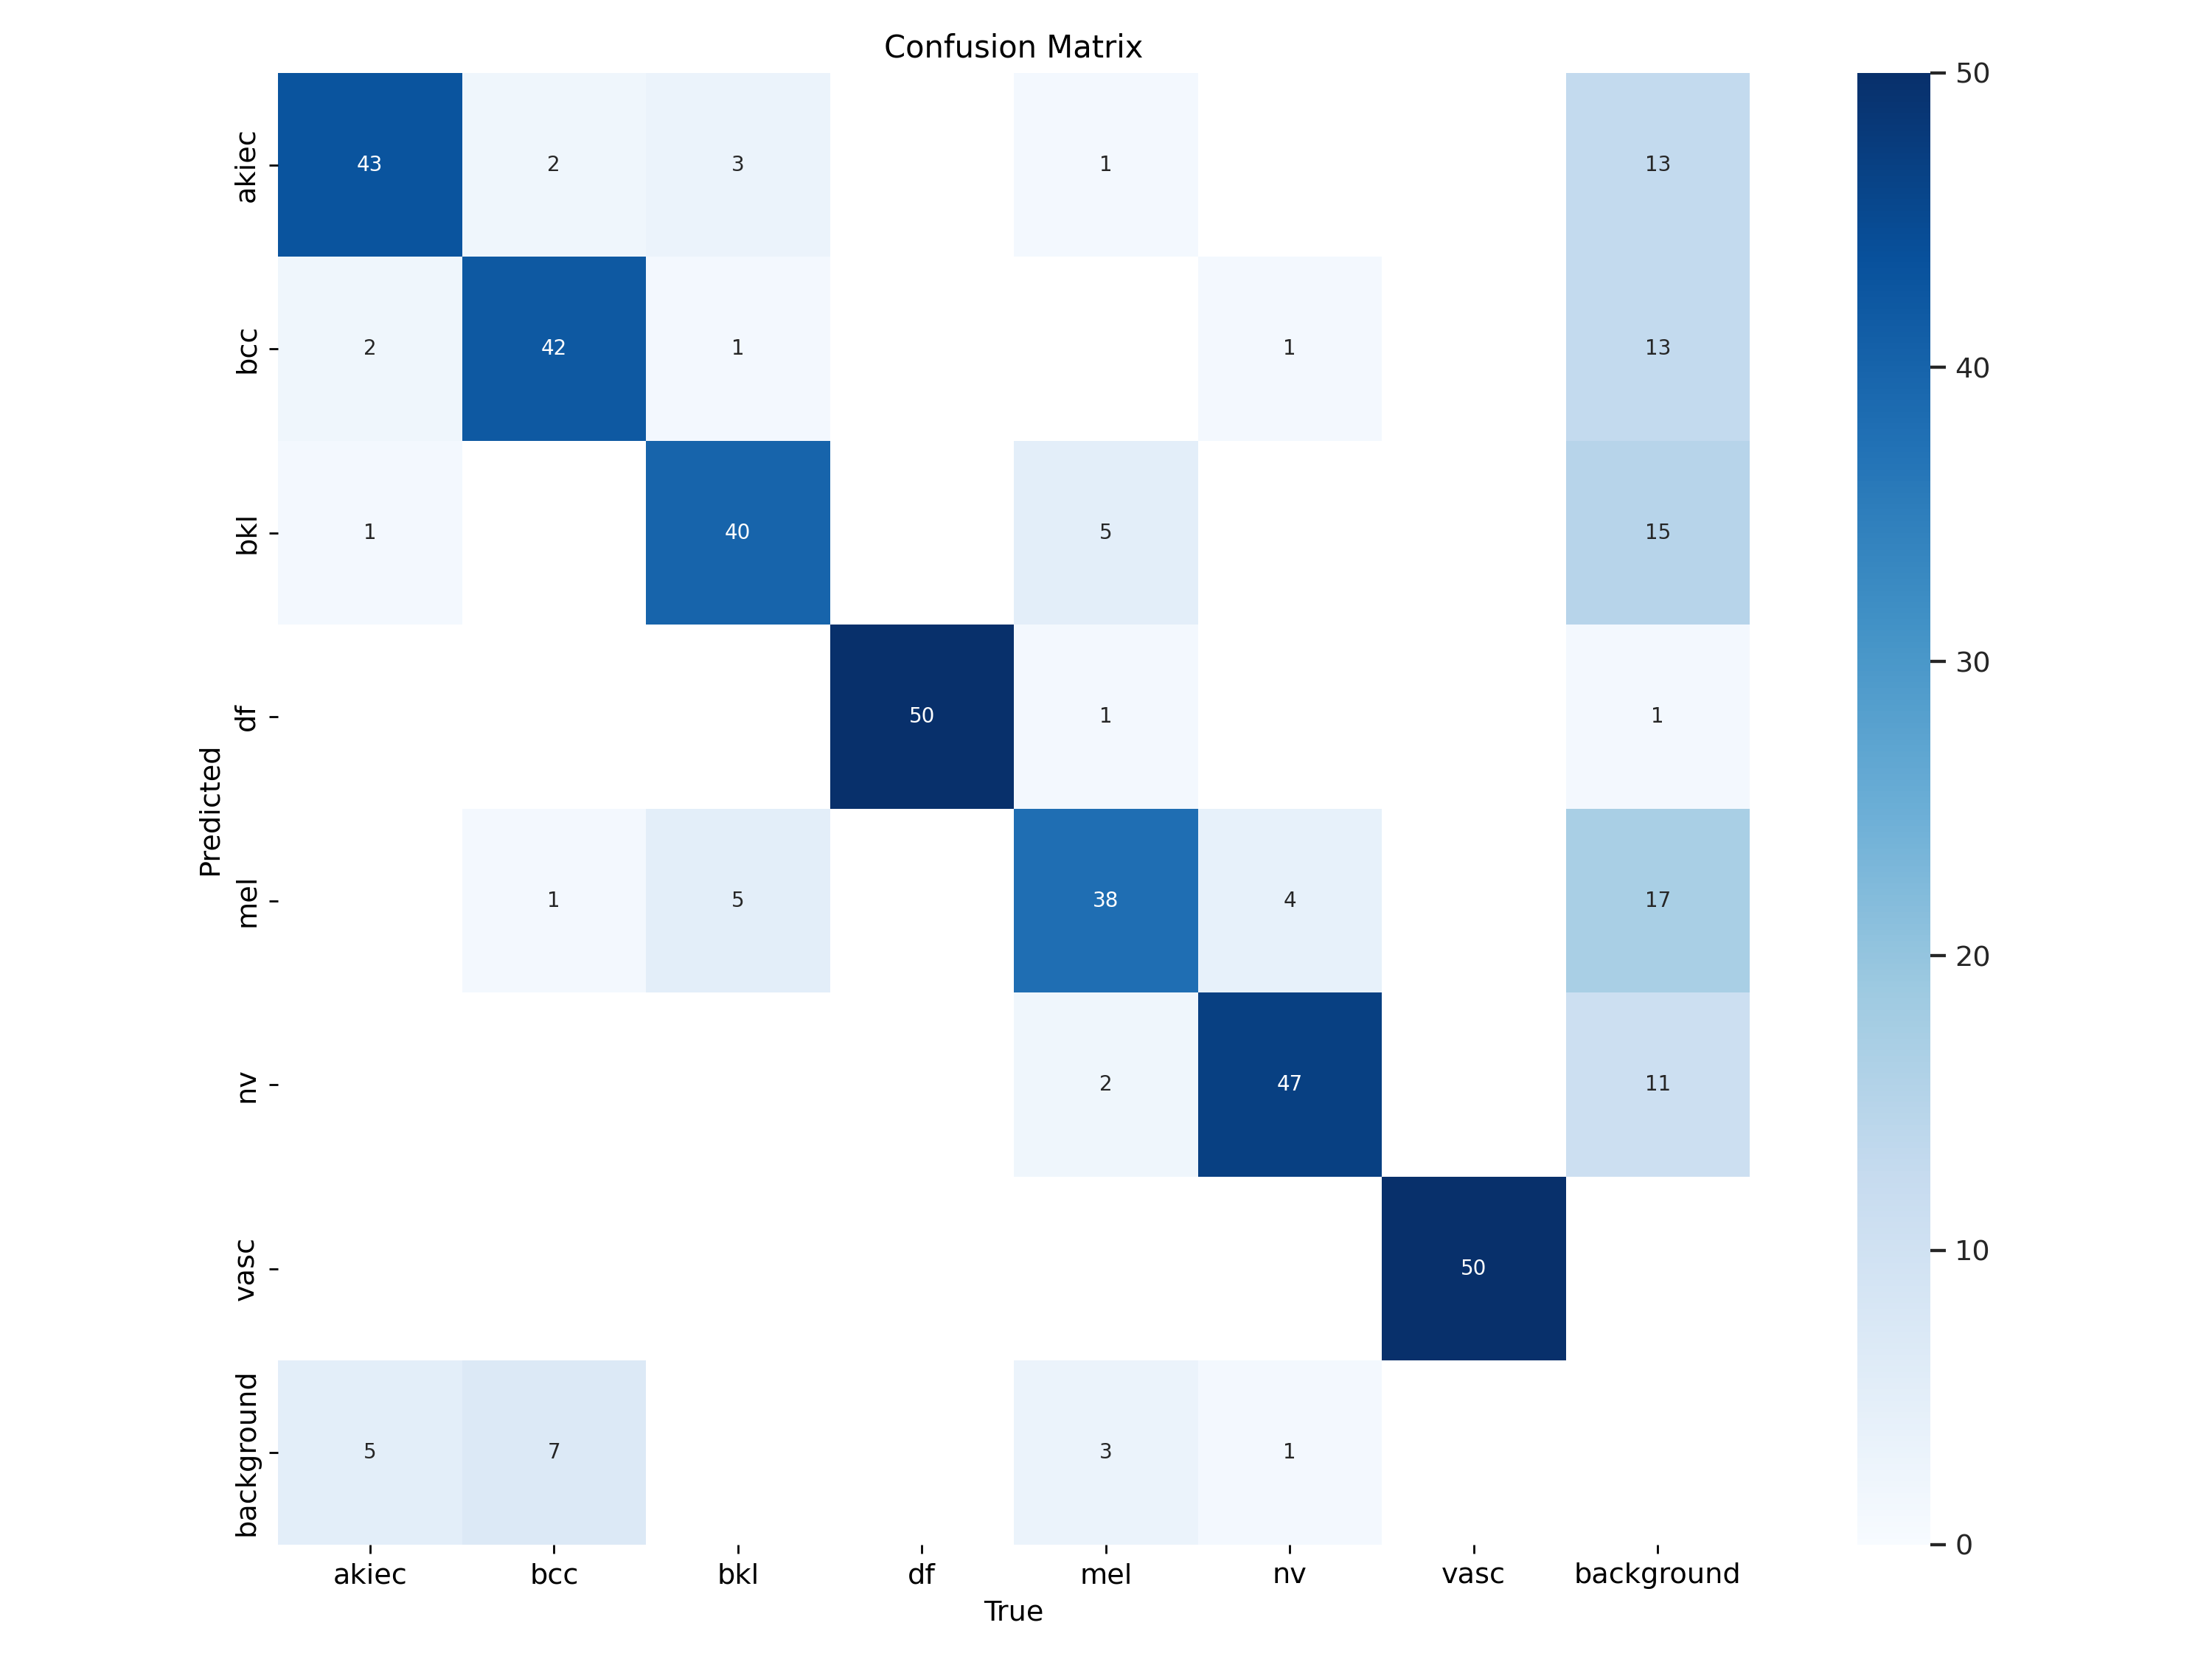

In [9]:
Image(filename=f'/content/runs/detect/train/confusion_matrix.png', width=600)

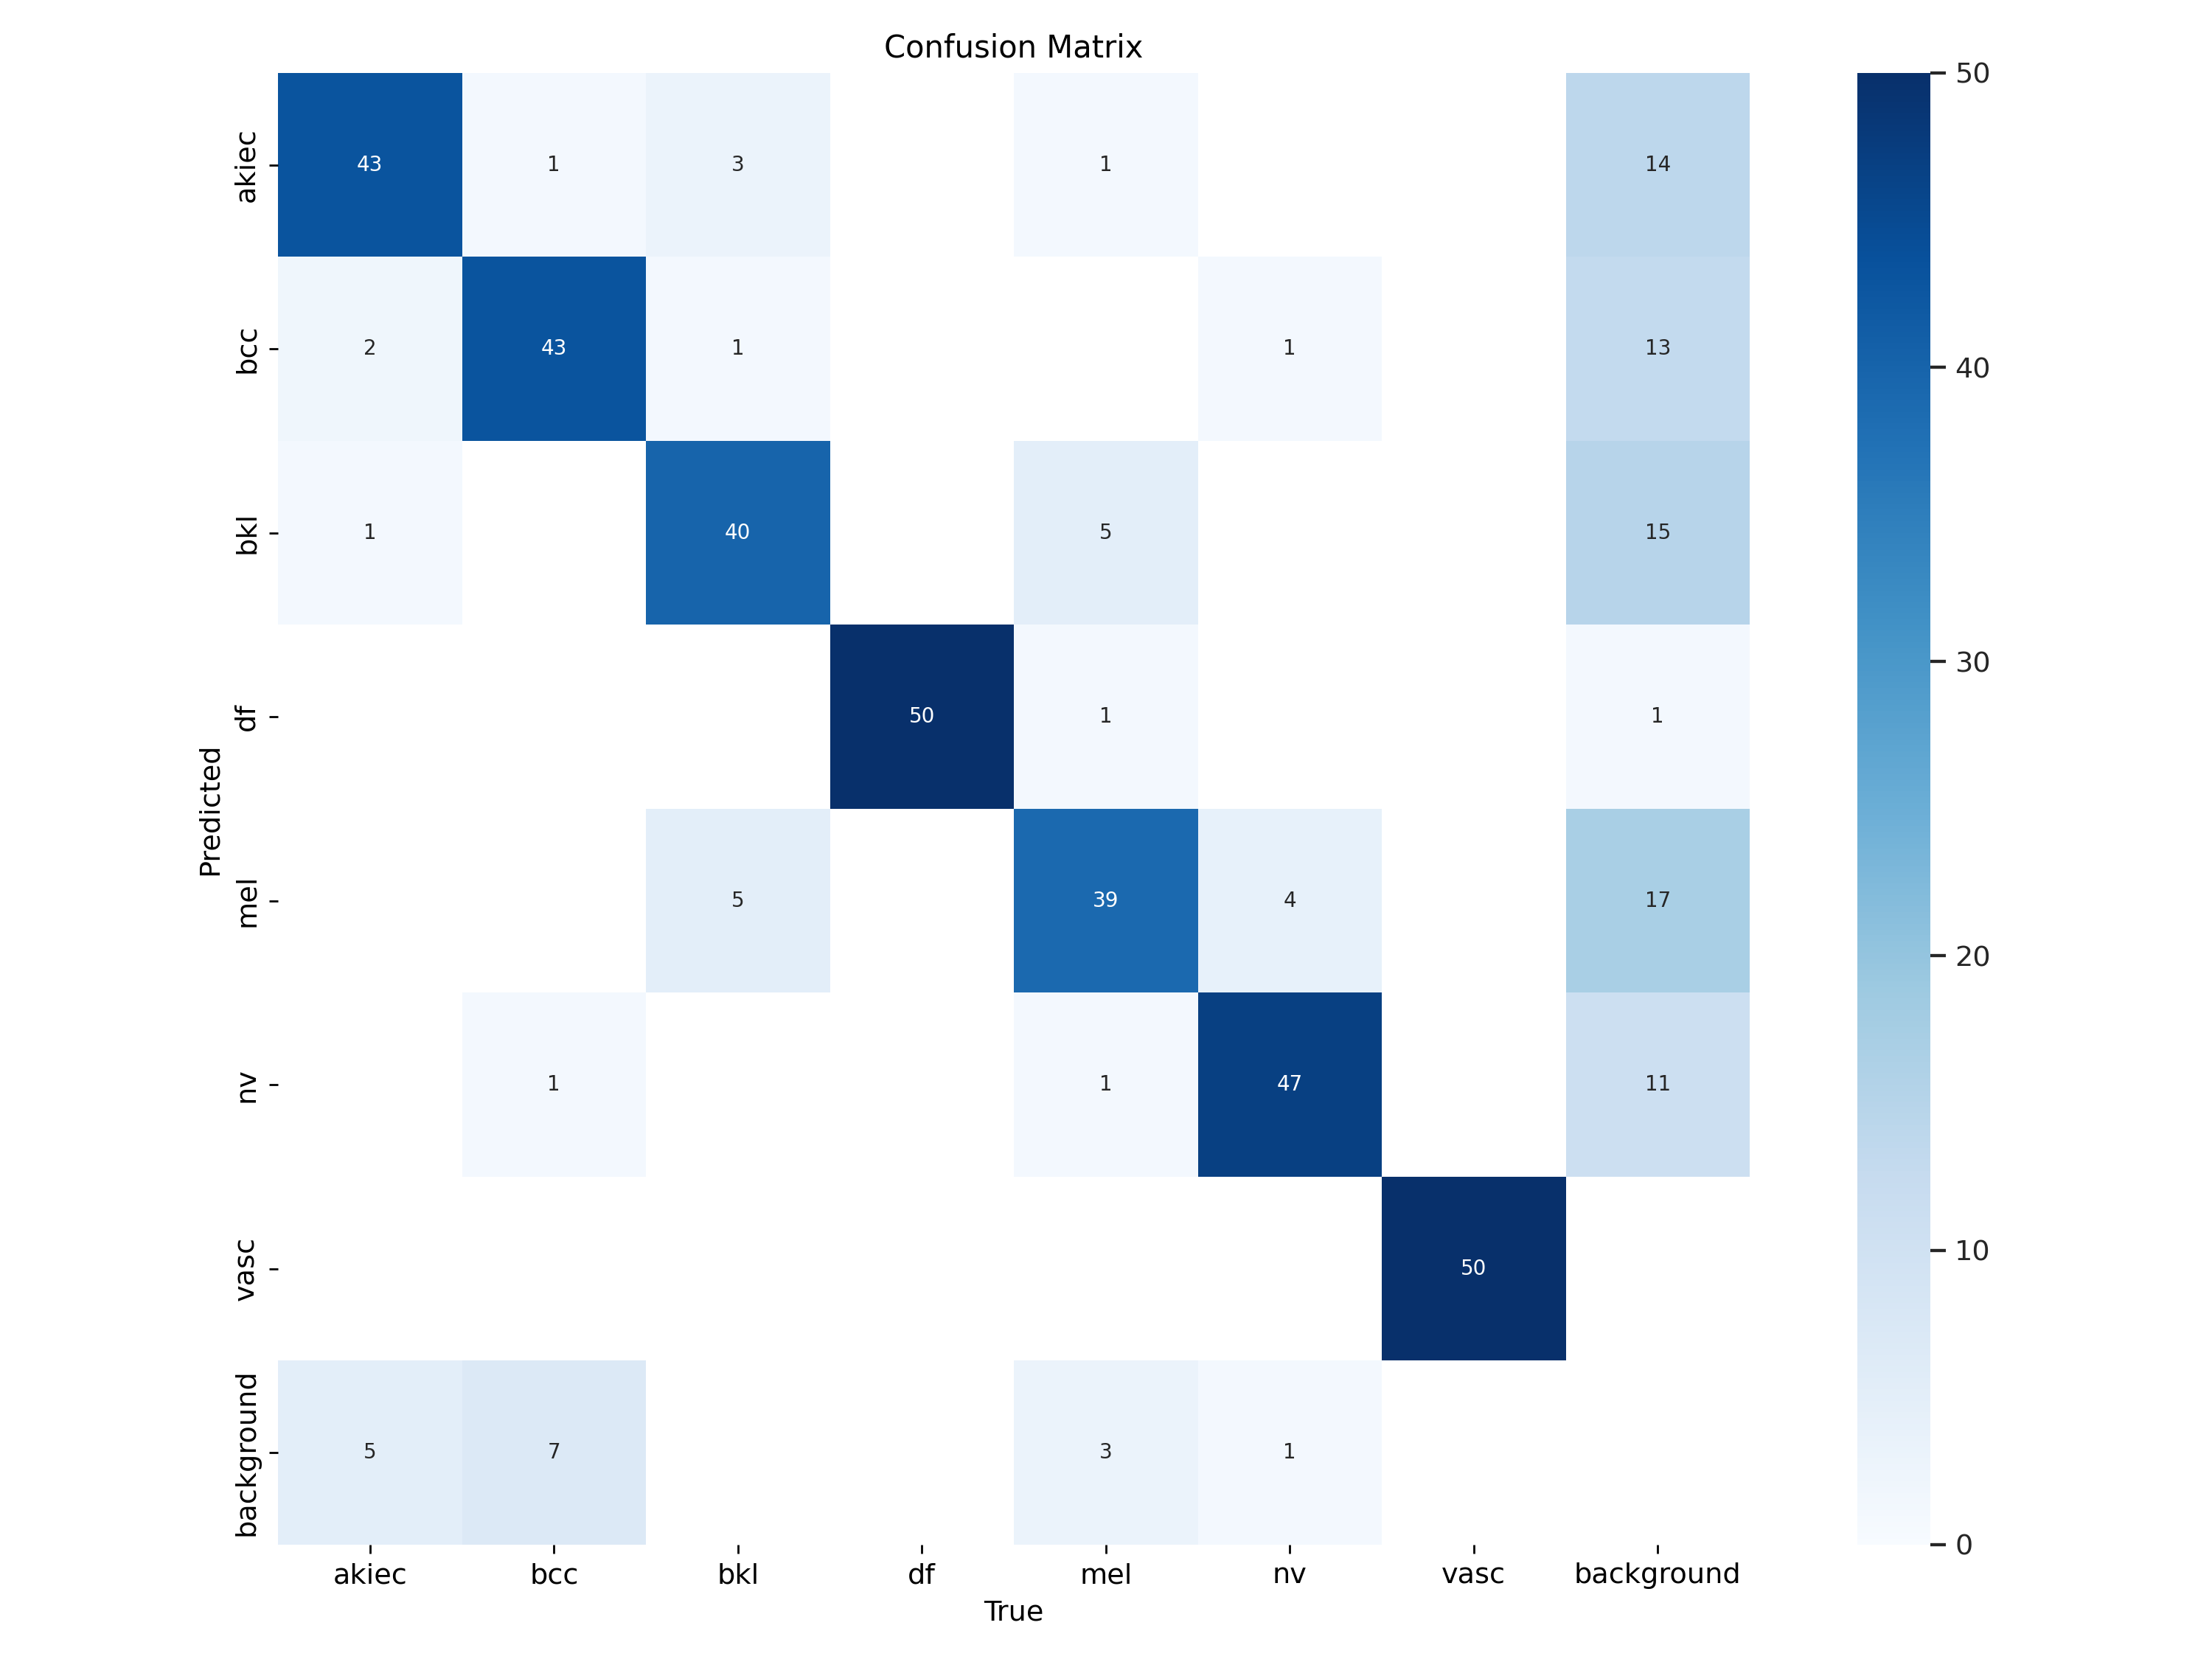

In [10]:
Image(filename=f'/content/runs/detect/val/confusion_matrix.png', width=600)

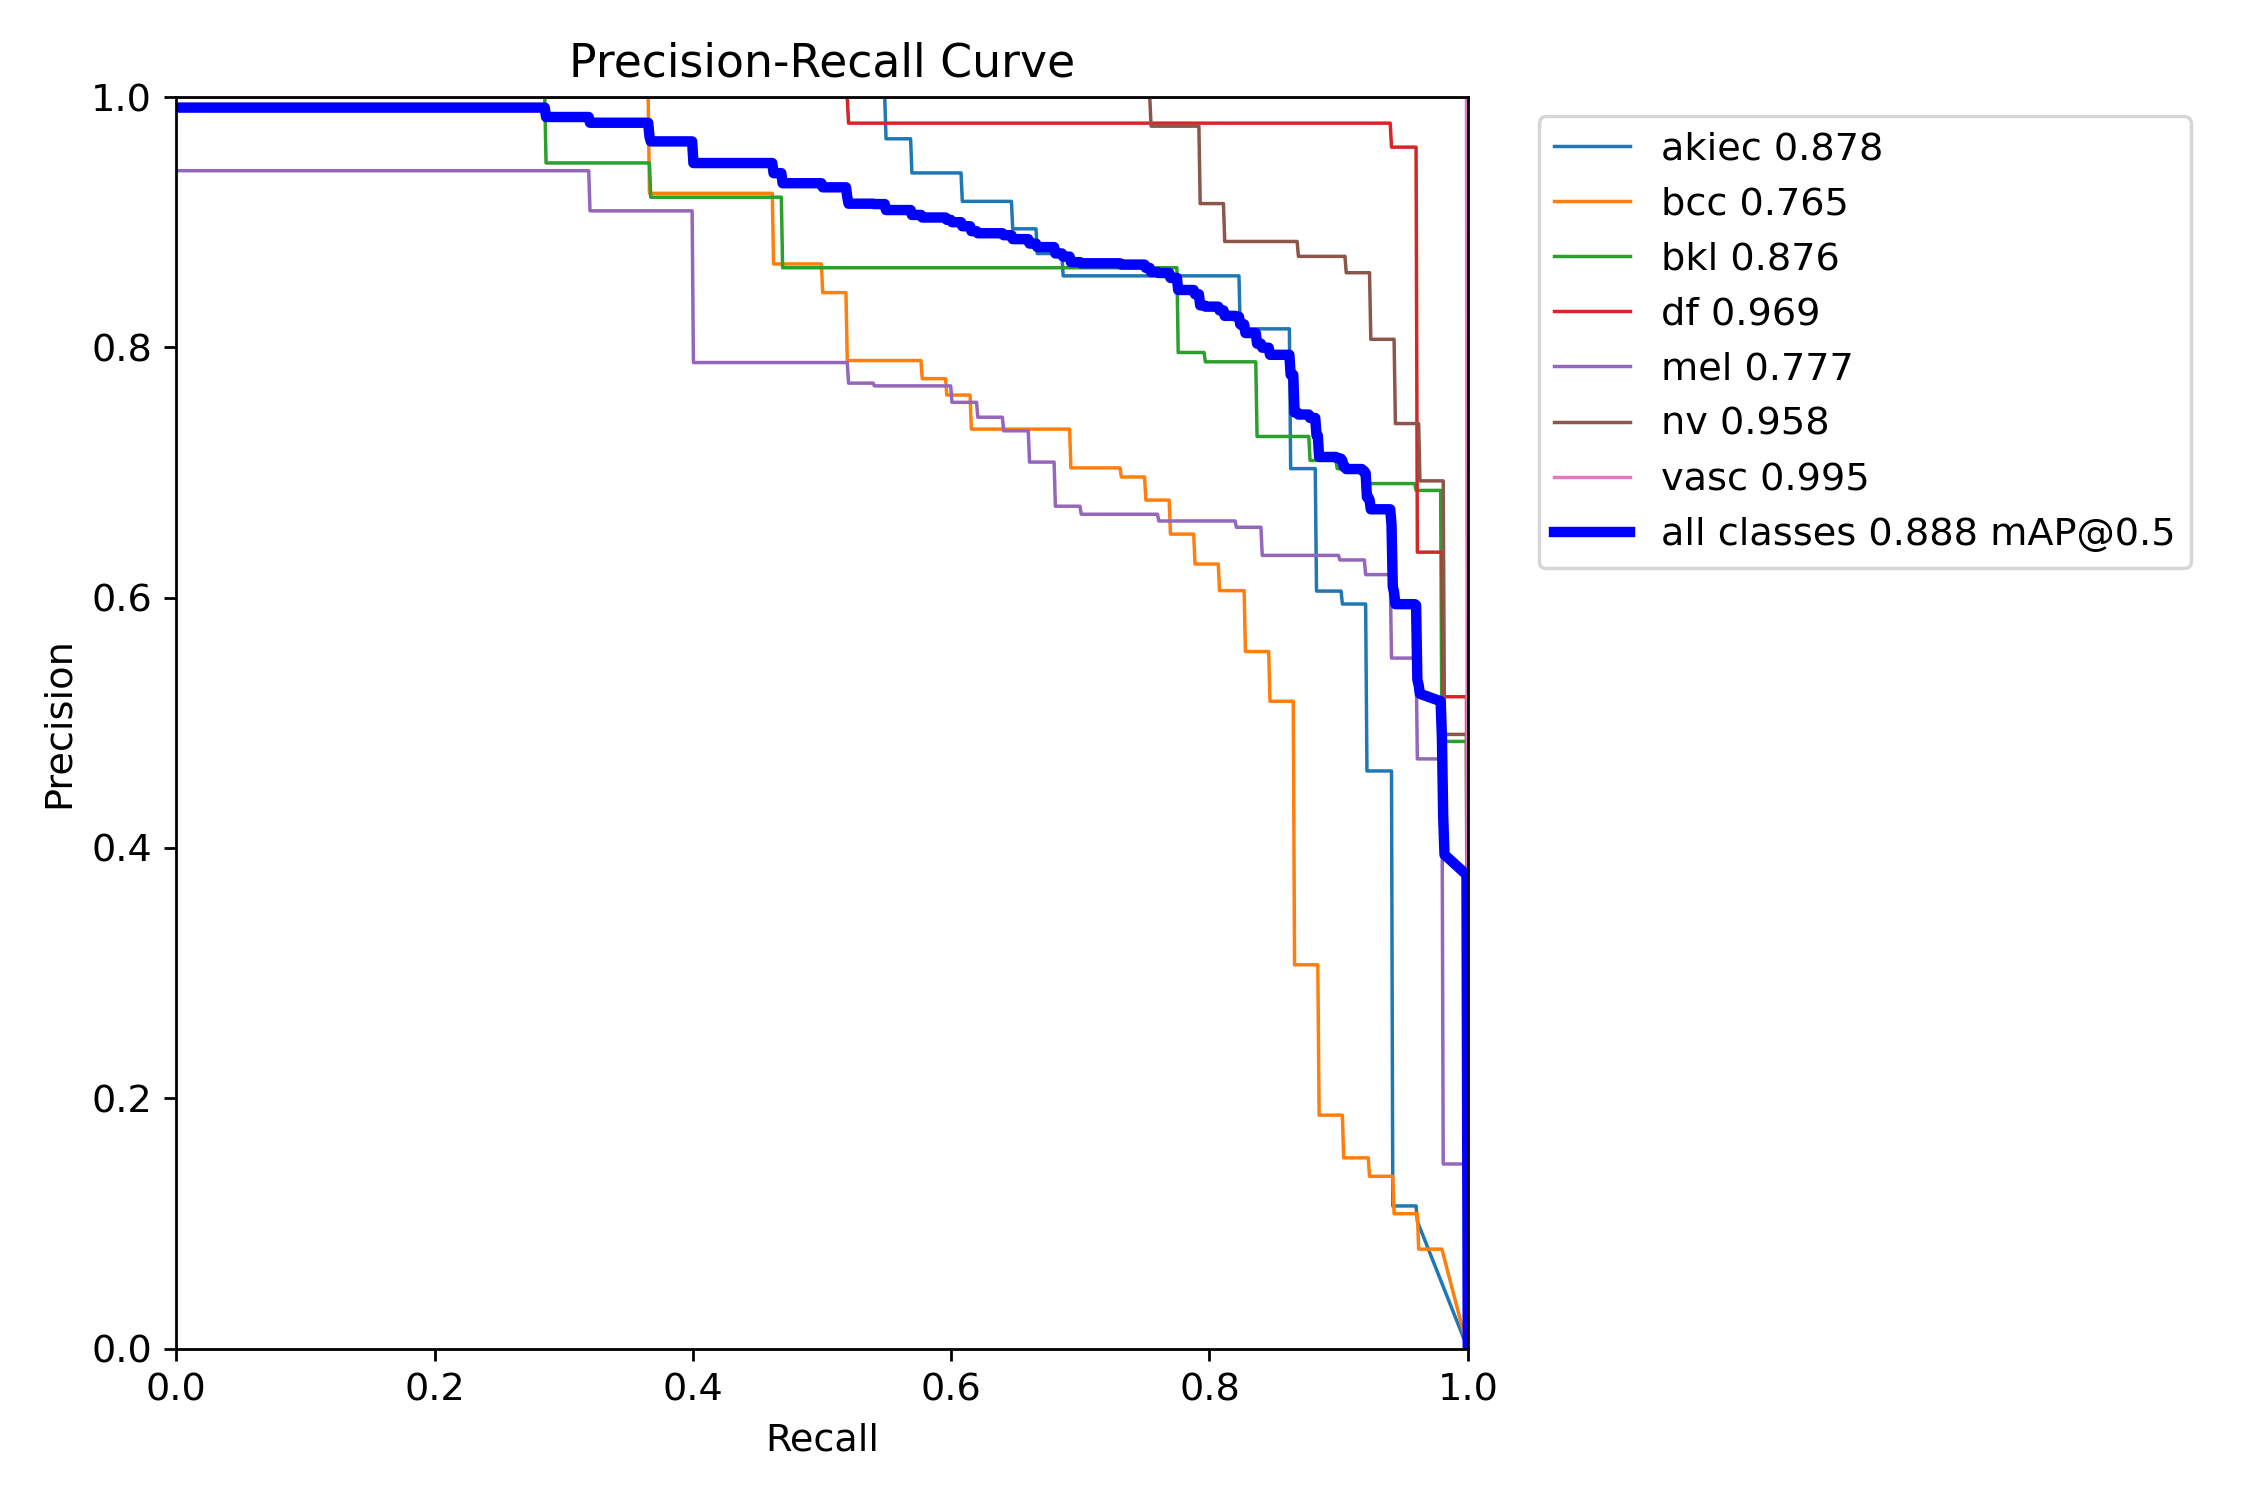

In [11]:
Image(filename=f'./runs/detect/val/PR_curve.png', width=600)

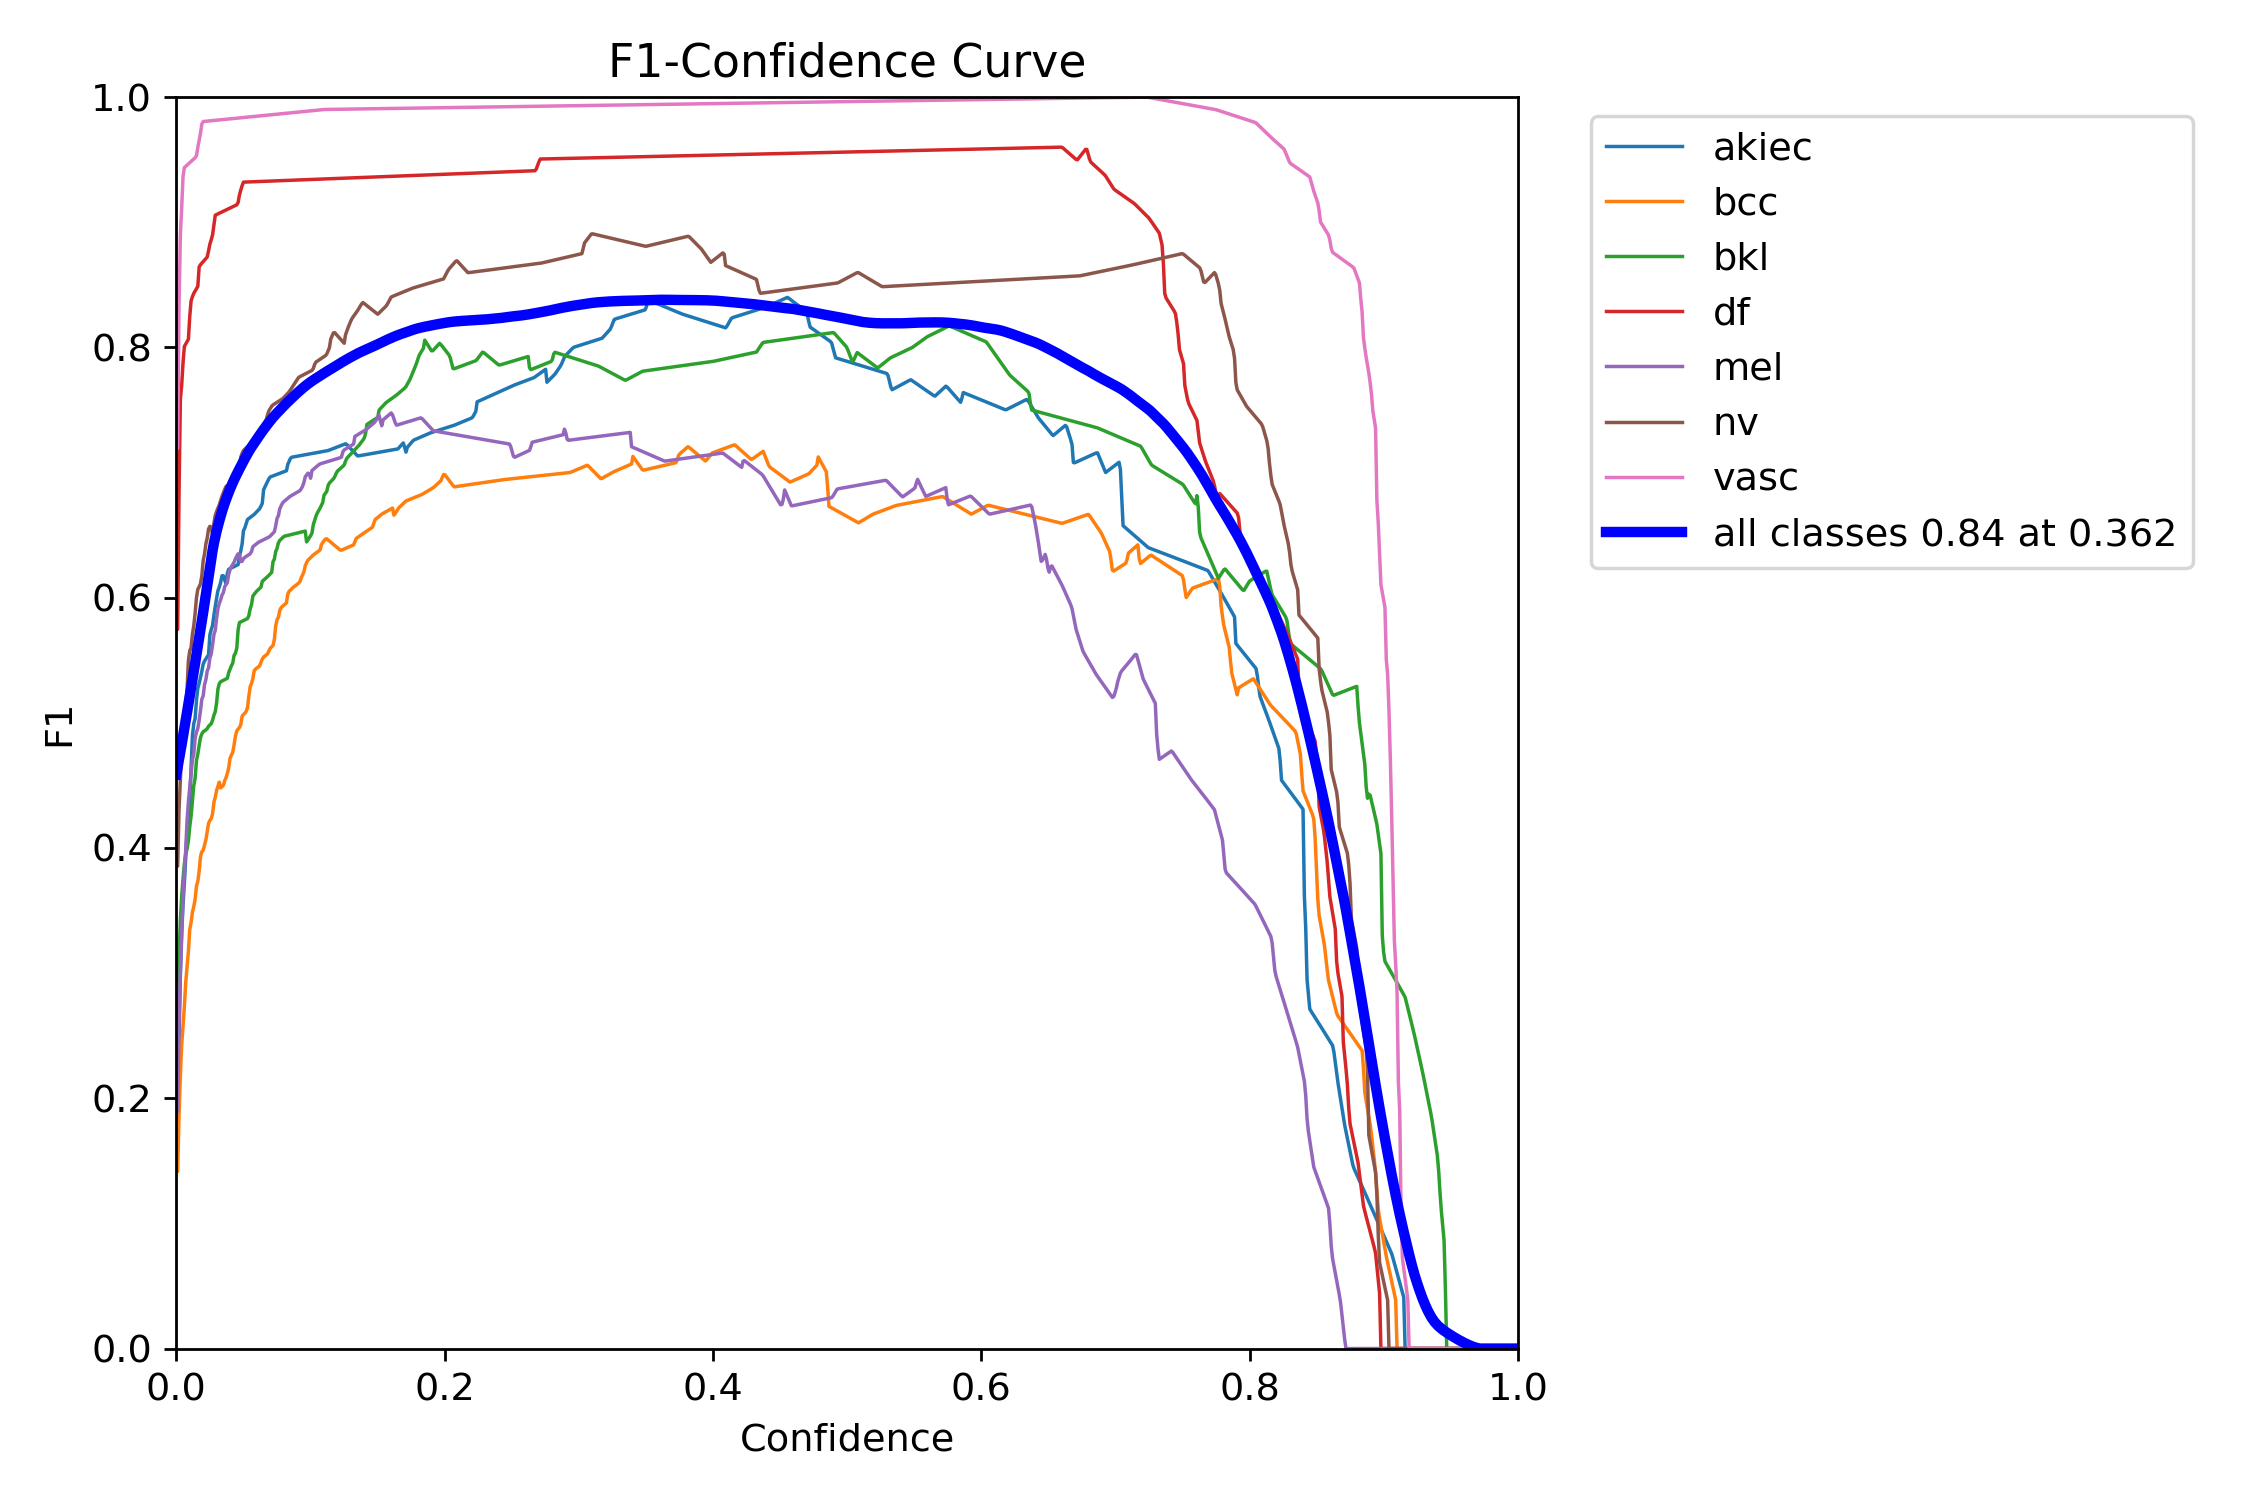

In [12]:
Image(filename=f'./runs/detect/val/F1_curve.png', width=600)